<a href="https://colab.research.google.com/github/RaghavKrishan/UnitedAirline/blob/main/unitedAirlinesNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sb

tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis").to('cuda')

customerComments = pd.read_csv("Survey data _Customer comments.csv")

# by - Raghav Krishan Garg


In [ ]:
def sentiment_analyzer(txt):
  if len(txt) > 512:
    txt = txt[:511]
  output = model(torch.tensor(tokenizer.encode(txt)).view(1, -1).to('cuda'))
  output = output.logits
  return output.argmax().item() + 1
  # if output.argmax() == 1 :
  #   return 1
  # else:
  #   return 0

In [ ]:
a = customerComments['verbatim_text'].apply(sentiment_analyzer)

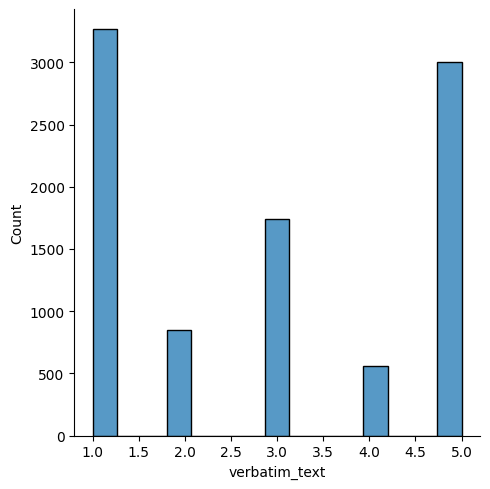

Counter({1: 3266, 5: 3007, 3: 1742, 2: 846, 4: 563})
% of positive comments: 37.88 %


In [ ]:
sb.displot(a)
plt.show()

list(a.tolist())

from collections import Counter
vals = Counter(a)
print(vals)

print('% of positive comments:',round((vals[4]+vals[5])/len(a)*100, 2),'%')